# Exploratory data analysis on Car features

#### This dataset contains more of 10, 000 rows which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more.  we will explore, clean and structure the data and make it ready for modeling.

In [128]:
# Setting the required libraries
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [129]:
# Loading the data into the data frame.
df = pd.read_csv("Car_exploration.csv")
# To display the top 10 rows 
df.head(10) 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [130]:
# To display the bottom 10 rows
df.tail(10)       

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11904,BMW,Z8,2002,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,130000
11905,BMW,Z8,2003,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,131500
11906,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46020
11907,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56570
11908,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50520
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


### Checking datatypes

In [131]:
# This shows data types of each attribute
df.dtypes              

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

### Removing irrelevant columns

The column Market Category is not in normalised form as it contains multiple values. We are not using columns like Vehicle Style, Vehicle Size.

In [132]:
# Dropping irrelevant columns
df = df.drop(['Market Category', 'Vehicle Style', 'Popularity', 'Vehicle Size'], axis=1)
df.head(5)   # REchecking after dropping above columns.

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,34500


### Renaming the columns 

This steps improves the readability of the data set by setting meaningful names.

In [133]:
df = df.rename(columns={"Engine Cylinders": "Cylinders", 
                        "Engine HP": "Eng_HP",
                        "Engine Fuel Type": "Fuel_type",
                        "Transmission Type": "Transmission", 
                        "Driven_Wheels": "D_Mode",
                        "highway MPG": "MPG-H", 
                        "city mpg": "MPG-C",
                        "MSRP": "Price" })
df.head(50)

,Make,Model,Year,Fuel_type,Eng_HP,Cylinders,Transmission,D_Mode,Number of Doors,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,26,17,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,28,20,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,27,18,37200


### Dropping the duplicate rows

In [134]:
# Check for duplicate rows and remove if any
df.shape

(11914, 12)

In [135]:
duplicate_rows = df[df.duplicated()]
print("Duplicate rows are: \n", duplicate_rows)

Duplicate rows are: 
          Make     Model  Year                    Fuel_type  Eng_HP  Cylinders  \
14        BMW  1 Series  2013  premium unleaded (required)   230.0        6.0   
18       Audi       100  1992             regular unleaded   172.0        6.0   
20       Audi       100  1992             regular unleaded   172.0        6.0   
24       Audi       100  1993             regular unleaded   172.0        6.0   
25       Audi       100  1993             regular unleaded   172.0        6.0   
...       ...       ...   ...                          ...     ...        ...   
11481  Suzuki      X-90  1998             regular unleaded    95.0        4.0   
11603   Volvo      XC60  2017             regular unleaded   302.0        4.0   
11604   Volvo      XC60  2017             regular unleaded   240.0        4.0   
11708  Suzuki       XL7  2008             regular unleaded   252.0        6.0   
11717  Suzuki       XL7  2008             regular unleaded   252.0        6.0   

     

In [136]:
# count the number of rows
df.count()      

Make               11914
Model              11914
Year               11914
Fuel_type          11911
Eng_HP             11845
Cylinders          11884
Transmission       11914
D_Mode             11914
Number of Doors    11908
MPG-H              11914
MPG-C              11914
Price              11914
dtype: int64


df = df.drop_duplicates()
df.head(10)

In [137]:
# count the number of rows after removing duplicates.
df.count()

Make               11914
Model              11914
Year               11914
Fuel_type          11911
Eng_HP             11845
Cylinders          11884
Transmission       11914
D_Mode             11914
Number of Doors    11908
MPG-H              11914
MPG-C              11914
Price              11914
dtype: int64

### Checking for missing or null values 


In [138]:
print(df.isnull().sum())


Make                0
Model               0
Year                0
Fuel_type           3
Eng_HP             69
Cylinders          30
Transmission        0
D_Mode              0
Number of Doors     6
MPG-H               0
MPG-C               0
Price               0
dtype: int64


In [139]:
# Dropping the missing values.
df = df.dropna()    
df.count()

Make               11812
Model              11812
Year               11812
Fuel_type          11812
Eng_HP             11812
Cylinders          11812
Transmission       11812
D_Mode             11812
Number of Doors    11812
MPG-H              11812
MPG-C              11812
Price              11812
dtype: int64

### Detecting Outliers and their validity

As outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removal has been performed using IQR score technique.

<AxesSubplot:xlabel='Eng_HP'>

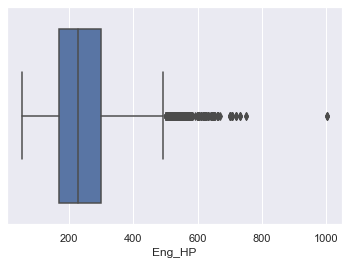

In [140]:
sns.boxplot(x=df['Eng_HP'])

<AxesSubplot:xlabel='Cylinders'>

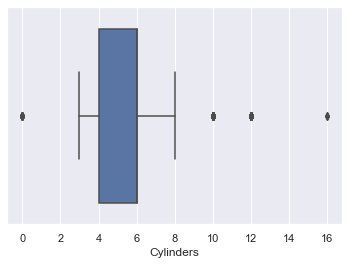

In [141]:
sns.boxplot(x=df['Cylinders'])

<AxesSubplot:xlabel='Price'>

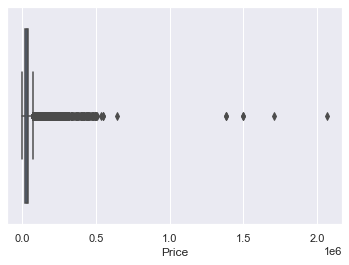

In [142]:
sns.boxplot(x=df['Price'])

In [143]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                   9.0
Eng_HP               130.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Price              21215.0
dtype: float64


In [149]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))]
df.shape

/var/folders/9z/h1vx4y_n0cz7wg8cx37fz2m80000gn/T/ipykernel_38011/3333668434.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))]


(11812, 12)

## Plot different features 
### Presenting through bar chart

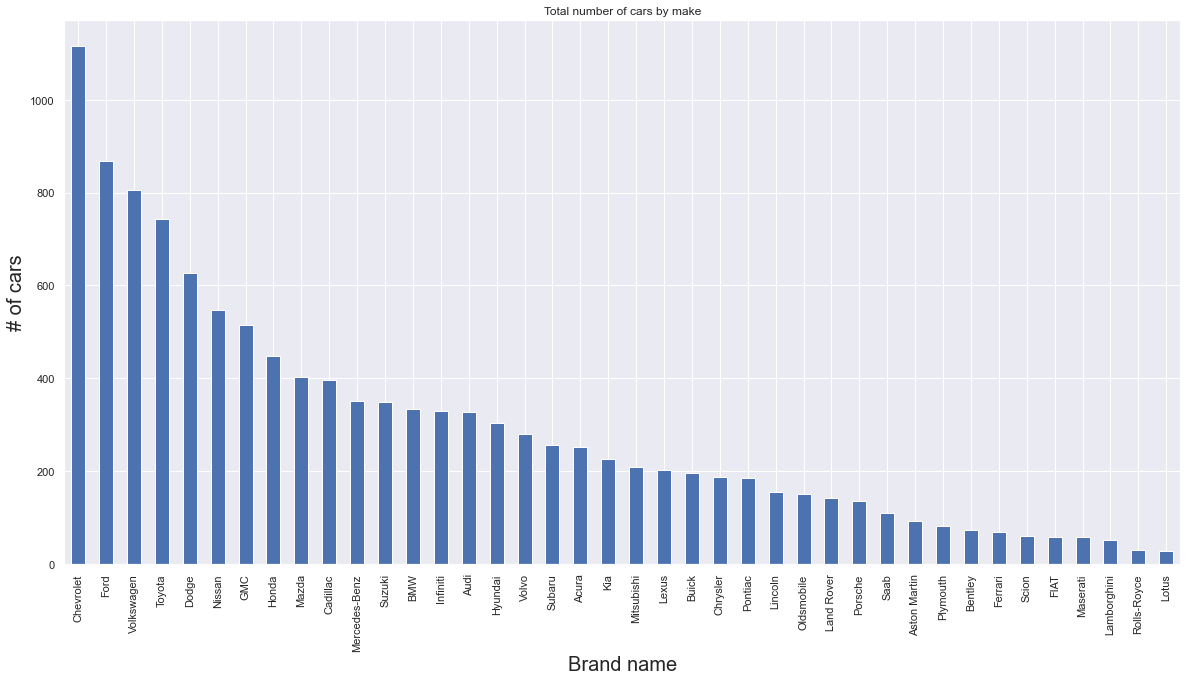

In [150]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(20,10))
plt.title("Total number of cars by make")
axis_font = {'fontname':'Arial', 'size':'20'}
plt.ylabel('# of cars', **axis_font)
plt.xlabel('Brand name', **axis_font);

In [34]:
#create histogram


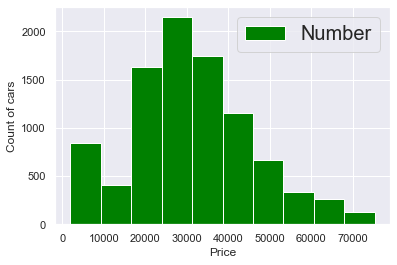

In [71]:
plt.hist([df.Price], color=['Green'], label=['Number'])
plt.xlabel('Price')
plt.ylabel('Count of cars')
plt.legend(prop ={'size': 20})
plt.show()

## Top 5 manufacturing companies 

There are several manufacturing companies. Lets focus on top 5 among them in terms of  

In [109]:
#Checking all transmission types
df.Transmission.unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'UNKNOWN'], dtype=object)

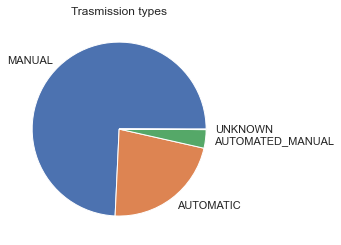

In [115]:

#labeling
myLables = ["MANUAL", "AUTOMATIC", "AUTOMATED_MANUAL", "UNKNOWN"]
plt.title('Trasmission types', fontsize=12)
plt.pie(df.Transmission.value_counts(),labels = df.Transmission.unique())
plt.show() 


### Presenting through Heatmap

This is to find the relationship between the features can be done using heat maps. 

,Year,Eng_HP,Cylinders,Number of Doors,MPG-H,MPG-C,Price
Year,1.000000,0.340657,-0.114164,0.258627,0.357125,0.319101,0.600031
Eng_HP,0.340657,1.000000,0.721893,0.048516,-0.455339,-0.552518,0.739609
Cylinders,-0.114164,0.721893,1.000000,0.000053,-0.709126,-0.759044,0.360285
Number of Doors,0.258627,0.048516,0.000053,1.000000,0.033317,0.045264,0.153390
MPG-H,0.357125,-0.455339,-0.709126,0.033317,1.000000,0.939797,-0.115581
MPG-C,0.319101,-0.552518,-0.759044,0.045264,0.939797,1.000000,-0.187641
Price,0.600031,0.739609,0.360285,0.153390,-0.115581,-0.187641,1.000000


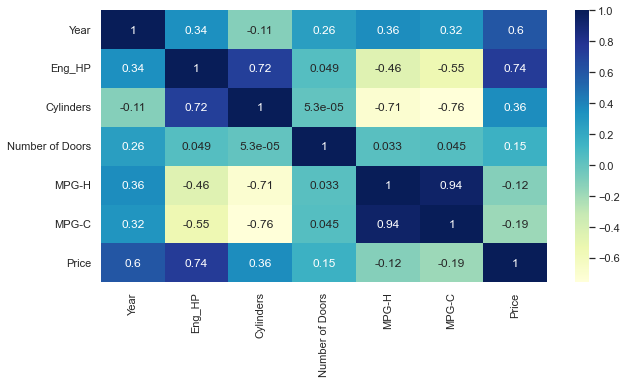

In [60]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="YlGnBu",annot=True)
c

By the above heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.